# `Team 10` - Rodrigo Arroyo, Hanbo Tan, Prame Chanathip Jhongjaiteth, Takahisa Sanada, Gabriel Chouraqui

-------------------------------------------------------------------------------------------------------------------------------

We have processed to an anlysis of a dataset containing data of countries happiness ranking for 2023.
We have first established a hypothesis and then brain stormed on what to do and which tools would be useful.

Lastly, an anlysis was conducted in order to answer the hypothesis.

`Hypothesis:` Regions with countries with higher GDP per capita have higher happiness scores thanks to better economic opportunities and living conditions.

-------------------------------------------------------------------------------------------------------------------------------

In [3]:
# Installing geopandas, useful for creating a map
# Since we are using data that contain Region and Countries, the map will be useful later
# Geopandas is not already installed in this environment

pip install geopandas

SyntaxError: invalid syntax (4018448684.py, line 5)

In [112]:
# Importing the warnings

import warnings
warnings.filterwarnings("ignore") # Ignoring all the warnings that might appear during execution

In [113]:
# Importing all the librairies needed to conduct our analysis

import matplotlib.pyplot as plt # Data visualization
import numpy as np # Numerical computations
import pandas as pd # Data manipulation
import seaborn as sns # Data visualization
import geopandas as gpd # Data visualization in a map

In [114]:
# Making sure all the probabilistic things are reproducible

np.random.seed(42)

In [115]:
# Specify the path to the datasets

data_path ="./data/"

# Specify the filenames of the datasets

whr_filename = "WHR2023.csv"

# Read the CSV files and create backup copies

whr_df_data = pd.read_csv(data_path + whr_filename)

# Create working copies of the dataframes for analysis

whr_df = whr_df_data.copy()

------------------------------

Now that we have imported our dataset into our environment, we can start the whole process.

In [116]:
# Taking a first look at the dataset

pd.set_option('display.max_column', None)
whr_df.sample(5) # Asking to see only 5 rows

,Country name,Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
105,Turkiye,Europe,4.614,0.083,4.777,4.450,10.307,0.796,68.663,0.475,-0.077,0.795,1.778,1.714,1.148,0.467,0.125,0.095,0.096,0.969
104,Namibia,Africa,4.631,0.069,4.766,4.496,9.121,0.787,56.851,0.669,-0.126,0.830,1.778,1.289,1.126,0.145,0.383,0.069,0.071,1.549
12,Canada,America,6.961,0.042,7.042,6.879,10.773,0.929,71.400,0.874,0.153,0.420,1.778,1.881,1.484,0.541,0.656,0.218,0.364,1.815
26,Taiwan Province of China,Asia,6.535,0.047,6.627,6.444,10.797,0.884,69.600,0.804,-0.129,0.681,1.778,1.890,1.372,0.492,0.562,0.067,0.178,1.974
123,Ethiopia,Africa,4.091,0.093,4.273,3.908,7.739,0.782,60.698,0.720,0.273,0.789,1.778,0.793,1.114,0.250,0.451,0.283,0.101,1.099


In [117]:
# Checking all the necessary information about the data

whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Region                                      137 non-null    object 
 2   Ladder score                                137 non-null    float64
 3   Standard error of ladder score              137 non-null    float64
 4   upperwhisker                                137 non-null    float64
 5   lowerwhisker                                137 non-null    float64
 6   Logged GDP per capita                       137 non-null    float64
 7   Social support                              137 non-null    float64
 8   Healthy life expectancy                     136 non-null    float64
 9   Freedom to make life choices                137 non-null    float64
 10  Generosity    

The data seems to be already clean. We will however make some changes and looking at outliers.

---------------------------------

### Data cleaning process

In [118]:
# Removing columns that won't be necessary for the analysis

whr_df = whr_df.drop(columns=['upperwhisker', 'lowerwhisker'])

In [119]:
# Calculating IQR for Ladder score column to find the outliers

Q1 = whr_df['Ladder score'].quantile(0.25) # Defining Q1

Q3 = whr_df['Ladder score'].quantile(0.75) # Defining Q2

IQR = Q3 - Q1 # Calculating the IQR

In [120]:
# Finding outliers using the IQR method

outliers = whr_df[~whr_df['Ladder score'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]
outliers

,Country name,Region,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
136,Afghanistan,Middle East,1.859,0.033,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.0,0.087,0.0,0.093,0.059,0.976


Afghanistan seems to be an outlier and it is because of its extremly low score for each factors. However, since the dataset contain values for all countries, we cannot delete it. We will keep it for our analysis.

In [121]:
# Checking the length of the dataset

len(whr_df)

137

In [122]:
# Checking all the unique values

whr_df.nunique().sort_values()

Ladder score in Dystopia                        1
Region                                          6
Standard error of ladder score                 64
Explained by: Generosity                      109
Explained by: Perceptions of corruption       111
Explained by: Healthy life expectancy         111
Perceptions of corruption                     115
Explained by: Freedom to make life choices    116
Social support                                116
Freedom to make life choices                  117
Generosity                                    122
Healthy life expectancy                       125
Explained by: Social support                  126
Dystopia + residual                           133
Explained by: Log GDP per capita              133
Ladder score                                  134
Logged GDP per capita                         135
Country name                                  137
dtype: int64

In [123]:
# Checking the total count of each Ladder score

whr_df['Ladder score'].value_counts()

Ladder score
6.144    2
6.125    2
5.277    2
7.804    1
5.071    1
        ..
6.260    1
6.265    1
6.300    1
6.330    1
1.859    1
Name: count, Length: 134, dtype: int64

In [124]:
# Checking for any missing value

missing_values = whr_df.isnull().sum() # Asking for the sum of each one
missing_values

Country name                                  0
Region                                        0
Ladder score                                  0
Standard error of ladder score                0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [125]:
# Checking rows with missing values in Healthy life expectancy, Explained by: Healthy life expectancy, Dystopia + residual

rows_with_missing_values = whr_df[whr_df['Healthy life expectancy'].isnull() | whr_df['Explained by: Healthy life expectancy'].isnull() | whr_df['Dystopia + residual'].isnull()]

In [126]:
# Prinitng the results

rows_with_missing_values['Country name']

98    State of Palestine
Name: Country name, dtype: object

"State of Palestine" seems to have some null values. Since i represent only one row out of the entire dataset, we decided to delete it. It won't have any major impact in our analysis.

In [127]:
# Dropping rows with missing values in specific columns

columns_with_missing_values = ['Healthy life expectancy', 'Explained by: Healthy life expectancy', 'Dystopia + residual']

# Dropping rows with NaN values in any of the specified columns

whr_df = whr_df.dropna(subset=columns_with_missing_values, how='any')

In [128]:
# Rechecking the missing values

missing_values = whr_df.isnull().sum()
missing_values

Country name                                  0
Region                                        0
Ladder score                                  0
Standard error of ladder score                0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [129]:
# Re checking the length of the dataset after the deletion of the row with missing values

len(whr_df)

136

Now we can see that our dataset doesn't have any missing values and the row with missing values has been correclty removed. 

We can do the last step of our cleaning process.

In [130]:
# Creating a new column Rank based on Ladder score where higher scores get a better rank

whr_df['Rank'] = whr_df['Ladder score'].rank(ascending=False).astype(int) # Making it as int data type

In [131]:
# Displaying the updated DataFrame with the new Rank column

whr_df[['Rank', 'Country name', 'Ladder score']].head(10) # Showing only 10 rows

,Rank,Country name,Ladder score
0,1,Finland,7.804
1,2,Denmark,7.586
2,3,Iceland,7.530
3,4,Israel,7.473
4,5,Netherlands,7.403
5,6,Sweden,7.395
6,7,Norway,7.315
7,8,Switzerland,7.240
8,9,Luxembourg,7.228
9,10,New Zealand,7.123


-------------------------------------------------------------------------------------------------------------------------------

### Now that the data is cleaned and that each data has its right type, we could process to a first analysis.

In [132]:
# Looking at who is the last one in the ranking - the least happy country :(

looser = whr_df.tail(1) # Asking to see the first from the bottom
looser

,Country name,Region,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank
136,Afghanistan,Middle East,1.859,0.033,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.0,0.087,0.0,0.093,0.059,0.976,136


In [133]:
# Looking at who is the happiest country!

winner = whr_df.head(1) # Asking to see the first from the top
winner

,Country name,Region,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank
0,Finland,Europe,7.804,0.036,10.792,0.969,71.15,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,1


In [134]:
# Looking at the ranking of Spain because we love Spain :)

spain_ranking = whr_df[whr_df['Country name'] == 'Spain']['Rank']
spain_ranking.values[0]

32

In [135]:
# Creating a first descriptive analysis

whr_df.describe()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,0.064515,9.455191,0.798632,64.967632,0.788081,0.023566,0.724588,1.778000e+00,1.408919,1.155088,0.366176,0.540912,0.149088,0.146478,1.777838,68.477941
std,1.142841,0.022996,1.210107,0.129597,5.750390,0.112498,0.141604,0.177353,2.897251e-15,0.433969,0.327263,0.156691,0.149671,0.075993,0.127009,0.504390,39.409337
min,1.859000,0.029000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000,1.000000
25%,4.702500,0.046750,8.587250,0.721000,60.648500,0.726250,-0.071000,0.666000,1.778000e+00,1.097750,0.959750,0.248500,0.458750,0.098500,0.059750,1.555250,34.750000
50%,5.693500,0.060000,9.574500,0.826500,65.837500,0.801000,0.002000,0.772500,1.778000e+00,1.451500,1.225500,0.389500,0.557500,0.137500,0.112000,1.848500,68.500000
75%,6.342500,0.076250,10.540250,0.896000,69.412500,0.874750,0.117500,0.846000,1.778000e+00,1.798000,1.401250,0.487500,0.656750,0.199250,0.188250,2.078750,102.250000
max,7.804000,0.147000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000,136.000000


This descriptive analysis shows crucial informations and some of them like the mean of Ladder Score will be useful for our analysis. We are going to extract them. 

In [136]:
# Creating a variable that represent the mean of the Ladder score that will be useful for our analysis

mean_ladder_score = whr_df['Ladder score'].mean()

In [137]:
# Creating a variable that take all the data that are above the mean

above_mean = whr_df[whr_df['Ladder score'] > mean_ladder_score]

In [138]:
# Creating a variable that take all the data that are below the mean

below_mean = whr_df[whr_df['Ladder score'] < mean_ladder_score]

In [139]:
# Calculate the mean ladder score by region for countries above the mean

mean_ladder_scores_above_mean = above_mean.groupby('Region')['Ladder score'].mean().reset_index() # Grouping by region
                                                                                   # reset_index returns the index back into regular columns and resets the index to default integer index

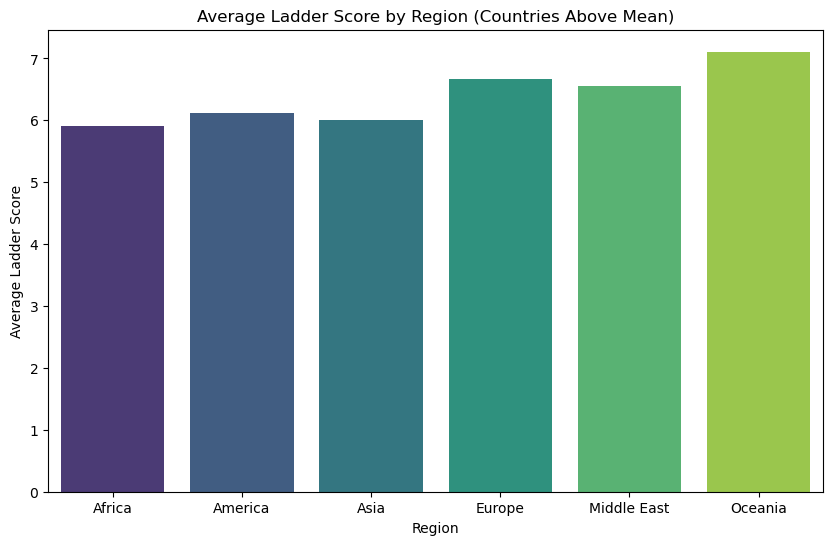

In [140]:
# Creating a bar plot using seaborn and matplotlib.pyplot

plt.figure(figsize=(10, 6)) # Choosing the size of the chart

sns.barplot(x='Region', y='Ladder score', data=mean_ladder_scores_above_mean, palette='viridis') # Setting all the variables needed like color, which data to show etc

plt.title('Average Ladder Score by Region (Countries Above Mean)') # To make it cleaner, we ask to give a title to the chart

plt.xlabel('Region') # Adding a x title

plt.ylabel('Average Ladder Score') # Adding a y title

plt.show()

In [141]:
# Calculate the mean ladder score by region for countries below the mean

mean_ladder_scores_below_mean = below_mean.groupby('Region')['Ladder score'].mean().reset_index() # Grouping by region
                                                                             # reset_index returns the index back into regular columns and resets the index to default integer index       

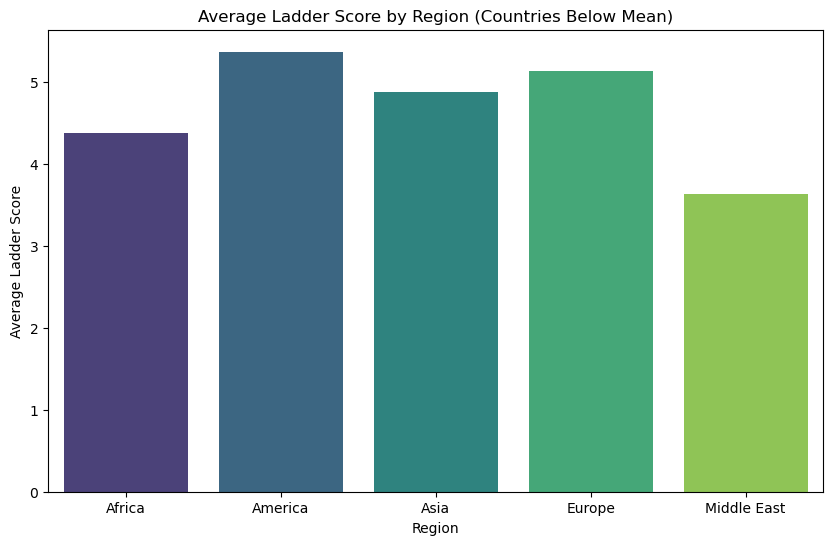

In [142]:
# Creating a bar plot using seaborn and matplotlib.pyplot

plt.figure(figsize=(10, 6)) # Choosing the size of the chart

sns.barplot(x='Region', y='Ladder score', data=mean_ladder_scores_below_mean, palette='viridis') # Setting all the variables needed like color, which data to show etc

plt.title('Average Ladder Score by Region (Countries Below Mean)') # To make it cleaner, we ask to give a title to the chart

plt.xlabel('Region') # Adding a x title

plt.ylabel('Average Ladder Score') # Adding a y title

plt.show()

Here we can see that unlike the last chart, Oceania disapear. The reason of that might be that it's because none of the country in Oceania has a Ladder score that is below the mean. 

Let's verify this.

In [143]:
# Filtering for Oceania in the Region column

oceania_data = whr_df[whr_df['Region'].str.contains('Oceania')]

In [144]:
# Looking for any data containing 'Oceania' and that are below the Ladder score mean

oceania_below_mean = oceania_data[oceania_data['Ladder score'] < mean_ladder_score]
oceania_below_mean

,Country name,Region,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank


We can confirm that the reason why Oceania disappear in the previous chart is because none of the countries in Oceania has a Ladder score that is below the mean. 

Looks like living the good life in Oceania!

-------------------------------------------------------------------------------------------------------------------------------

### Deeper analysis

Here, we want to run a correlation to see the factors that impact the most the ladder score. 
To do so, we need to select only the data that are float. We cannot run any correlation with string or object.

In [145]:
# Select the columns that are float type

float_columns = whr_df.select_dtypes(include=['float64'])

In [146]:
# Calculate the correlation matrix for the float columns

correlation_matrix = float_columns.corr()
correlation_matrix

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.511006,0.783836,0.838056,0.746928,0.661960,0.039829,-0.470561,NaN,0.783811,0.838161,0.746699,0.661944,0.039395,0.470568,0.494452
Standard error of ladder score,-0.511006,1.000000,-0.583166,-0.479001,-0.616240,-0.292048,0.104190,0.301629,NaN,-0.583116,-0.479228,-0.616204,-0.291945,0.104223,-0.301647,-0.006732
Logged GDP per capita,0.783836,-0.583166,1.000000,0.741762,0.837533,0.449462,-0.162298,-0.435373,NaN,1.000000,0.741820,0.837520,0.449482,-0.162722,0.435424,-0.044568
Social support,0.838056,-0.479001,0.741762,1.000000,0.725524,0.546319,0.040528,-0.275255,NaN,0.741657,0.999997,0.725404,0.546546,0.039941,0.275124,0.148731
Healthy life expectancy,0.746928,-0.616240,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,NaN,0.837531,0.725454,0.999998,0.415195,-0.135356,0.404526,-0.014420
Freedom to make life choices,0.661960,-0.292048,0.449462,0.546319,0.415092,1.000000,0.164666,-0.381467,NaN,0.449413,0.546317,0.414861,0.999994,0.164080,0.381349,0.211993
Generosity,0.039829,0.104190,-0.162298,0.040528,-0.135036,0.164666,1.000000,-0.118300,NaN,-0.162244,0.040340,-0.135202,0.164679,0.999990,0.118008,0.016380
Perceptions of corruption,-0.470561,0.301629,-0.435373,-0.275255,-0.404396,-0.381467,-0.118300,1.000000,NaN,-0.435347,-0.275446,-0.404289,-0.381485,-0.117630,-0.999996,-0.004467
Ladder score in Dystopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explained by: Log GDP per capita,0.783811,-0.583116,1.000000,0.741657,0.837531,0.449413,-0.162244,-0.435347,NaN,1.000000,0.741715,0.837518,0.449433,-0.162667,0.435398,-0.044543


This correlation is not enough clear to allow us to see deep insights. We will create other visualizations.

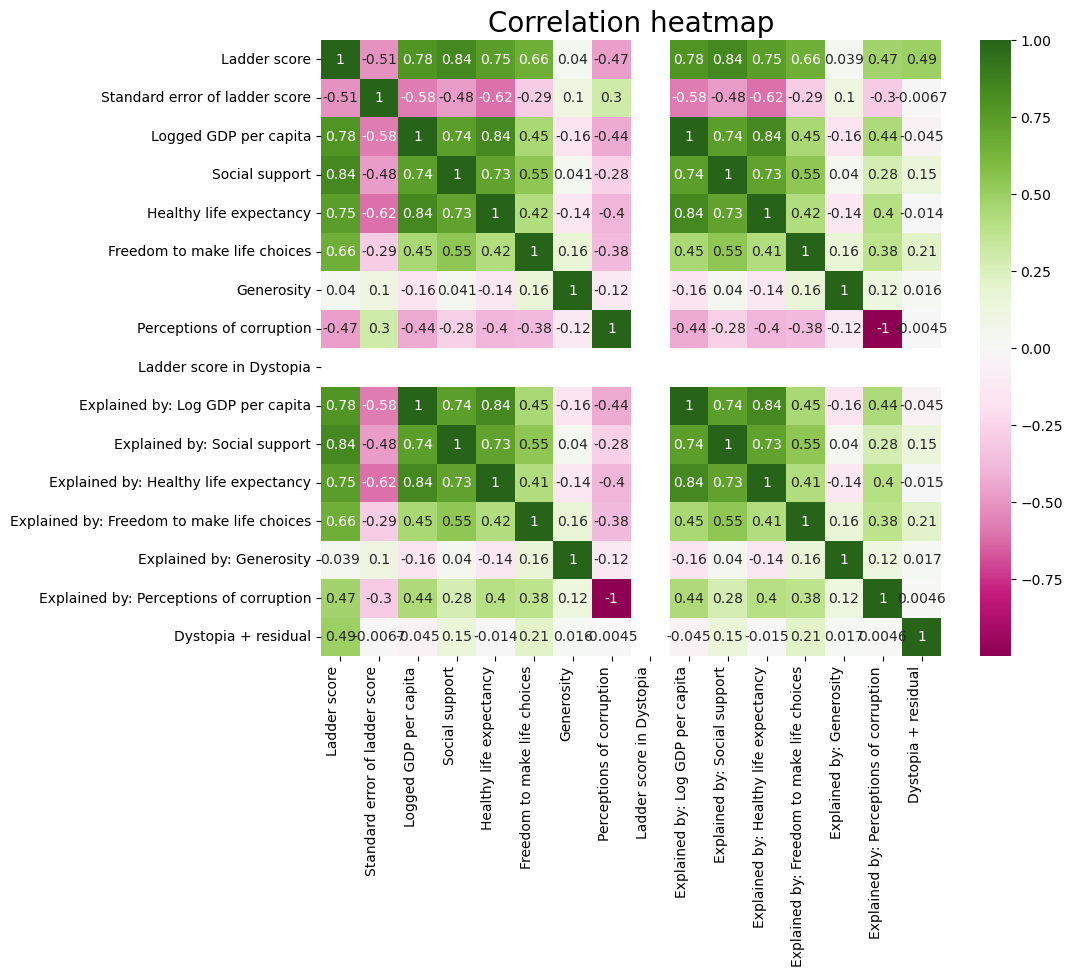

In [147]:
# Showing the correlation on a heatmap with information to check which variables have the strongest correlation with happiness score

plt.figure(figsize=(10,8)) # Choosing the size of the chart

plt.title("Correlation heatmap", fontsize = 20) # To make it cleaner, we ask to give a title and its font to the chart

sns.heatmap(correlation_matrix ,annot=True, cmap="PiYG") # Setting up the color and the setting of the heatmap

plt.xticks(rotation = 90, ha = 'right'); # Setting up the right orientation of the title for a better reading

After taking a look at this visualization, we understood that we were needed only to see the correlation of the Ladder Score against all other variables. So we modified the code and we ran another visualization. 

In [148]:
# Setting up that the correlation_ladder_score is a series containing correlations

correlation_ladder_score = float_columns.corr(method='spearman')['Ladder score'] # method='spearman' is used to calculate the Spearman correlation coefficients of the Ladder score column against all others columns in the DataFrame.

In [149]:
# Creating a DataFrame from the Series for visualization and transposing it

correlation_df = pd.DataFrame(correlation_ladder_score).transpose()

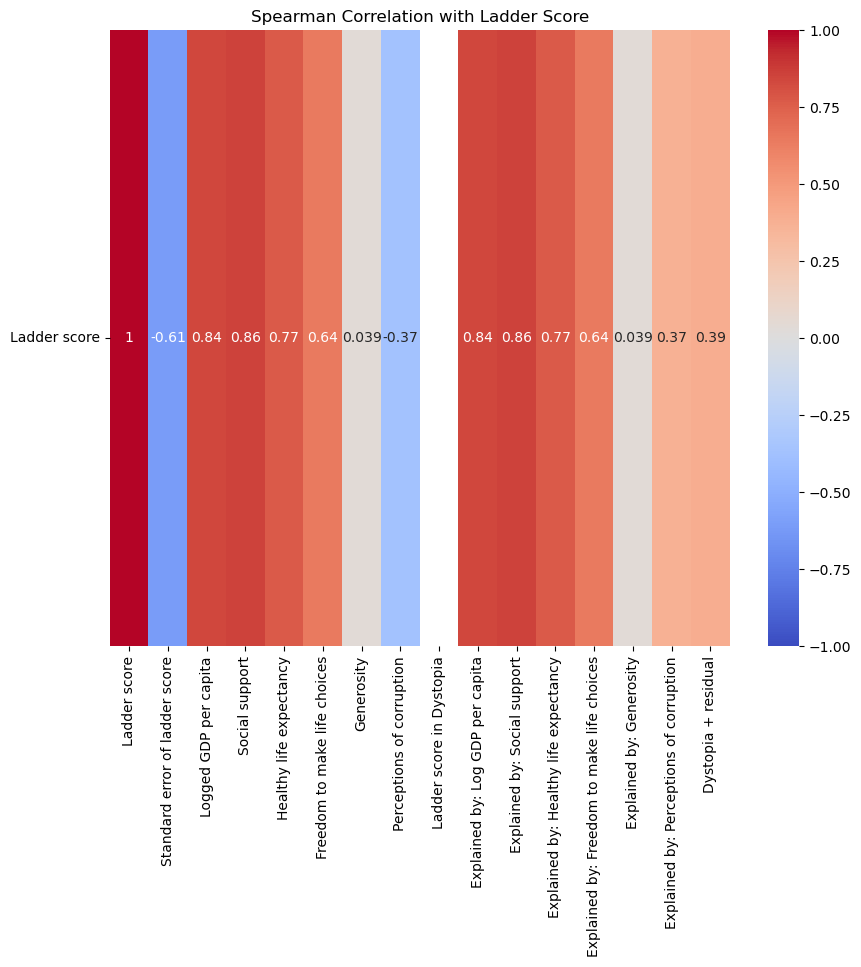

In [150]:
# Showing the heatmap with a rotated orientation

plt.figure(figsize=(10, 8)) # Choosing the size of the chart

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Setting all the variables needed like color, which data to show etc

plt.xticks(rotation=90) # Rotating the x title to better reading

plt.yticks(rotation=0) # No need to rotate for the y axis

plt.title('Spearman Correlation with Ladder Score') # Adding a title
plt.show()

We created another visual to make it easier to read

posx and posy should be finite values
posx and posy should be finite values


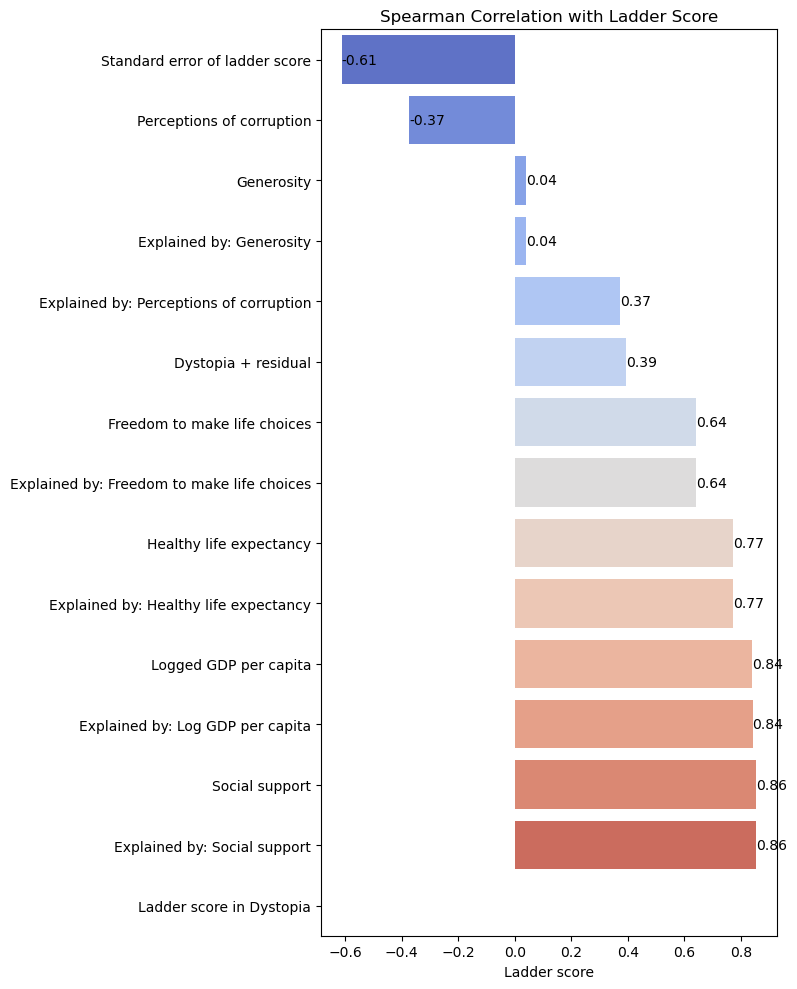

In [151]:
# Sort correlations for plotting
sorted_corr = correlation_ladder_score.drop('Ladder score').sort_values()

# Plotting the horizontal bar plot
plt.figure(figsize=(8, 10))

bar_plot = sns.barplot(x=sorted_corr, y=sorted_corr.index, palette='coolwarm')

plt.title('Spearman Correlation with Ladder Score')

# Displaying the correlation values on the bars
for i, val in enumerate(sorted_corr):
    bar_plot.text(val, i, f'{val:.2f}', va='center')

plt.tight_layout()
plt.show()

This visualization allows us to see the main variables that impact the most the ladder score. It seems that Social support, GDP per capita and Healthy life expectancy are the ones who impact the ladder score the most.

-------------------------------------------------------------------------------------------------------------------------------

### Creating deeper visualizations

To make better visualization, we decided to put everything in a map. For doing that, we were needed to have the name of each country and each Ladder score. 

In [152]:
# Creating a list of all the countries names in the column Country name

countries_list = whr_df['Country name'].tolist() if 'Country name' in whr_df else [] # The last part check if Country name exists in the column of whr_df. It's to make sure with got data for each one.
print(countries_list)

['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden', 'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Canada', 'Ireland', 'United States of America ', 'Germany', 'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France', 'Slovenia', 'Costa Rica', 'Romania', 'Singapore', 'United Arab Emirates', 'Taiwan Province of China', 'Uruguay', 'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo', 'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua', 'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus', 'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary', 'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal', 'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia', 'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay', 'Montenegro', 'Jamaica', 'Bolivia', 'Russia', 'Bosnia and Herzegovina', 'Colombia', 'Dominican Republic', 'Ecuador', 'Peru', 'Philippines', 'Bulgaria', 'Nepal', 'Armenia', 'Tajikista

In [153]:
# Creating a list of all the ladder score in the column Ladder score

hapiness_score_list = whr_df['Ladder score'].tolist() if 'Ladder score' in whr_df else [] # The last part check if Country name exists in the column of whr_df. It's to make sure with got data for each one.
print(hapiness_score_list)

[7.804, 7.586, 7.53, 7.473, 7.403, 7.395, 7.315, 7.24, 7.228, 7.123, 7.097, 7.095, 6.961, 6.911, 6.894, 6.892, 6.859, 6.845, 6.796, 6.763, 6.661, 6.65, 6.609, 6.589, 6.587, 6.571, 6.535, 6.494, 6.469, 6.463, 6.455, 6.436, 6.405, 6.368, 6.334, 6.33, 6.3, 6.265, 6.26, 6.259, 6.213, 6.173, 6.15, 6.144, 6.144, 6.13, 6.129, 6.125, 6.125, 6.122, 6.041, 6.024, 6.023, 6.014, 6.012, 5.968, 5.951, 5.931, 5.902, 5.843, 5.84, 5.825, 5.819, 5.818, 5.763, 5.738, 5.722, 5.703, 5.684, 5.661, 5.633, 5.63, 5.569, 5.559, 5.526, 5.523, 5.466, 5.36, 5.342, 5.33, 5.329, 5.308, 5.277, 5.277, 5.275, 5.267, 5.254, 5.211, 5.111, 5.109, 5.072, 5.071, 5.053, 5.035, 4.981, 4.973, 4.954, 4.941, 4.903, 4.876, 4.855, 4.724, 4.638, 4.631, 4.614, 4.605, 4.555, 4.501, 4.497, 4.487, 4.442, 4.432, 4.397, 4.393, 4.374, 4.372, 4.282, 4.279, 4.198, 4.17, 4.137, 4.12, 4.091, 4.042, 4.036, 4.019, 3.982, 3.694, 3.545, 3.495, 3.435, 3.207, 3.204, 3.138, 2.392, 1.859]


In [154]:
# We assign the data with all the name and the ladder score collected before
data = {
    'Country name': ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden', 'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Canada', 'Ireland', 'United States of America', 'Germany', 'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France', 'Slovenia', 'Costa Rica', 'Romania', 'Singapore', 'United Arab Emirates', 'Taiwan Province of China', 'Uruguay', 'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo', 'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua', 'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus', 'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary', 'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal', 'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia', 'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay', 'Montenegro', 'Jamaica', 'Bolivia', 'Russia', 'Bosnia and Herzegovina', 'Colombia', 'Dominican Republic', 'Ecuador', 'Peru', 'Philippines', 'Bulgaria', 'Nepal', 'Armenia', 'Tajikistan', 'Algeria', 'Hong Kong S.A.R. of China', 'Albania', 'Indonesia', 'South Africa', 'Congo (Brazzaville)', 'North Macedonia', 'Venezuela', 'Laos', 'Georgia', 'Guinea', 'Ukraine', 'Ivory Coast', 'Gabon', 'Nigeria', 'Cameroon', 'Mozambique', 'Iraq', 'Morocco', 'Iran', 'Senegal', 'Mauritania', 'Burkina Faso', 'Namibia', 'Turkiye', 'Ghana', 'Pakistan', 'Niger', 'Tunisia', 'Kenya', 'Sri Lanka', 'Uganda', 'Chad', 'Cambodia', 'Benin', 'Myanmar', 'Bangladesh', 'Gambia', 'Mali', 'Egypt', 'Togo', 'Jordan', 'Ethiopia', 'Liberia', 'India', 'Madagascar', 'Zambia', 'Tanzania', 'Comoros', 'Malawi', 'Botswana', 'Congo (Kinshasa)', 'Zimbabwe', 'Sierra Leone', 'Lebanon', 'Afghanistan'],  # Replace with actual country names
    'Ladder score': [7.804, 7.586, 7.53, 7.473, 7.403, 7.395, 7.315, 7.24, 7.228, 7.123, 7.097, 7.095, 6.961, 6.911, 6.894, 6.892, 6.859, 6.845, 6.796, 6.763, 6.661, 6.65, 6.609, 6.589, 6.587, 6.571, 6.535, 6.494, 6.469, 6.463, 6.455, 6.436, 6.405, 6.368, 6.334, 6.33, 6.3, 6.265, 6.26, 6.259, 6.213, 6.173, 6.15, 6.144, 6.144, 6.13, 6.129, 6.125, 6.125, 6.122, 6.041, 6.024, 6.023, 6.014, 6.012, 5.968, 5.951, 5.931, 5.902, 5.843, 5.84, 5.825, 5.819, 5.818, 5.763, 5.738, 5.722, 5.703, 5.684, 5.661, 5.633, 5.63, 5.569, 5.559, 5.526, 5.523, 5.466, 5.36, 5.342, 5.33, 5.329, 5.308, 5.277, 5.277, 5.275, 5.267, 5.254, 5.211, 5.111, 5.109, 5.072, 5.071, 5.053, 5.035, 4.981, 4.973, 4.954, 4.941, 4.903, 4.876, 4.855, 4.724, 4.638, 4.631, 4.614, 4.605, 4.555, 4.501, 4.497, 4.487, 4.442, 4.432, 4.397, 4.393, 4.374, 4.372, 4.282, 4.279, 4.198, 4.17, 4.137, 4.12, 4.091, 4.042, 4.036, 4.019, 3.982, 3.694, 3.545, 3.495, 3.435, 3.207, 3.204, 3.138, 2.392, 1.859]  # Replace with corresponding ladder scores
}

In [155]:
# Create a GeoDataFrame from the sample data - this is needed when we want to put data in a world map

gdf = gpd.GeoDataFrame(data)

In [156]:
# After a bit of research on Interet, we load the world map data

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [157]:
# Merging the world map with our GeoDataFrame based on country names

world = world.merge(gdf, how='left', left_on='name', right_on='Country name')

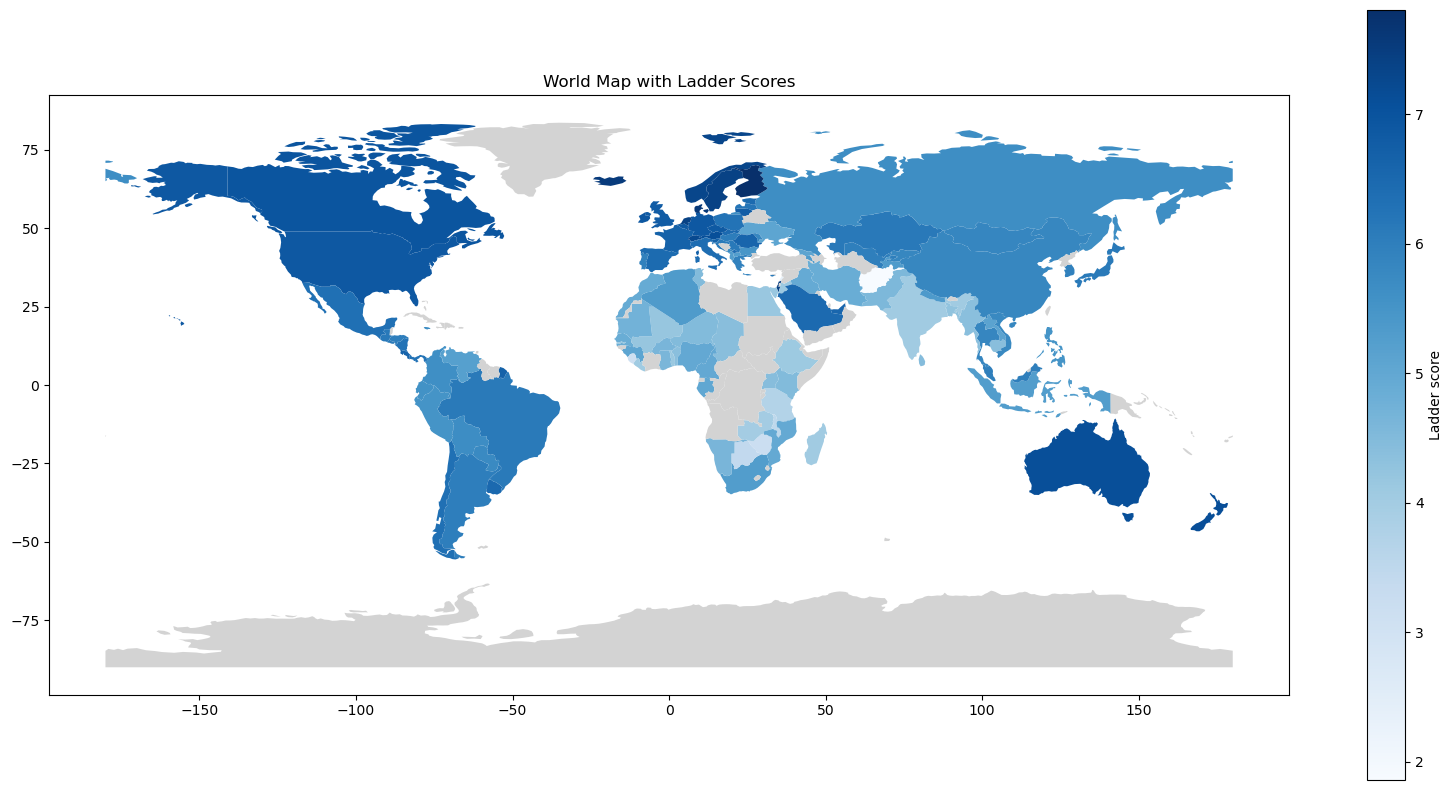

In [158]:
# Creqting the map

fig, ax = plt.subplots(1, 1, figsize=(20, 10)) # Choosing the size

world.plot(column='Ladder score', ax=ax, legend=True, legend_kwds={'label': "Ladder score"}, cmap='Blues', missing_kwds={'color': 'lightgrey'}) # Setting all the variables needed like color, which data to show etc

plt.title('World Map with Ladder Scores')
plt.show()

This visualization shows us all the countries in a map, with their Ladder score. The highest ladder score they have, the darker the blue is. Countries with no data are marked in grey.
We can see that countries in Africa and Asia are the ones with the lowest ladder score. According to our past results, we can start saying that the GDP and the social support is pretty low in these areas.
However, countries in America and Europe that tend to have a higher ladder score might have a high GDP per capita and a high social support. 

-------------------------------------------------------------------------------------------------------------------------------

### For the last step, we will run some meaningful visualization that will help us to answer our hypothesis.

`Hypothesis:`Regions with countries with higher GDP per capita have higher happiness scores thanks to better economic opportunities and living conditions.


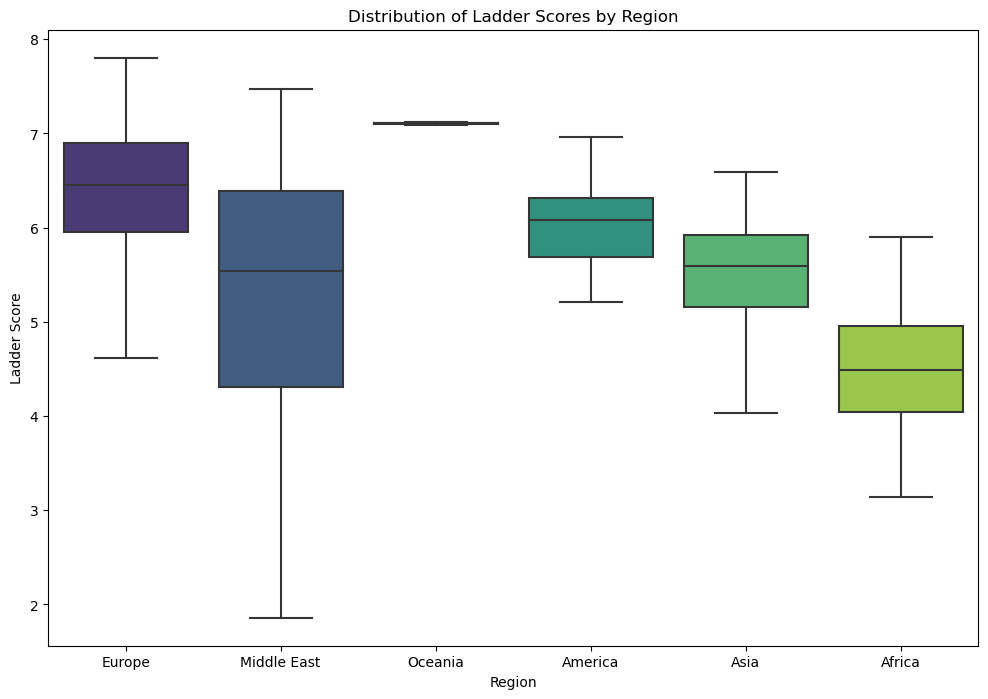

In [159]:
# Creating a boxplot to have a good understanding of the distribution per region

plt.figure(figsize=(12, 8)) # Choosing the size of the chart

sns.boxplot(x='Region', y='Ladder score', data=whr_df, palette='viridis') # Setting all the variables needed like color, which data to show etc

plt.title('Distribution of Ladder Scores by Region') # Assigning a title

plt.xlabel('Region') # Assigning a x axis title

plt.ylabel('Ladder Score') # Assigning a y axis title
plt.show()

This box plot represents the distribution of the data per region. We can see that the Middle East is the most wide since it contains a country among the top 5 ladder score and the last one of the ranking. In fact, Israel is at the 4th place and Afghanistan is the last one. That explains the wide distribution.

-------------------------------------------------------------------------------------------------------------------------------

### Final step

Here, we want to have a better visualization of all the data at once. We will create a scatter plot to see all the data per region and answer our hypothesis.

In [160]:
# Filter relevant columns

data = whr_df[['Region', 'Ladder score', 'Logged GDP per capita']]

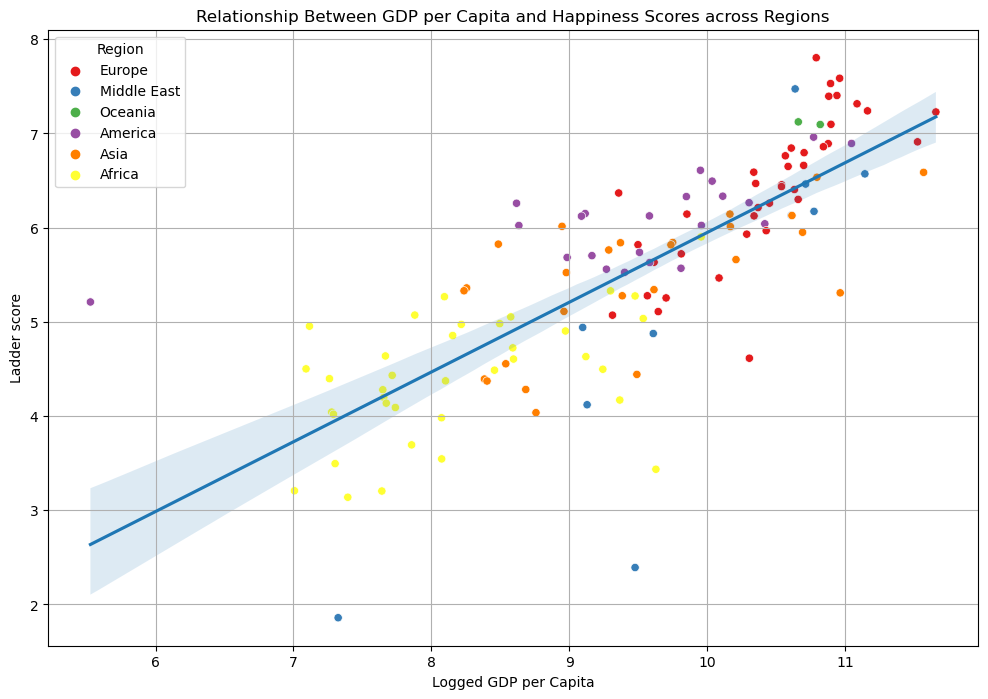

In [161]:
# Lastly, in a scatter plot, showing the relationship between GDP per capita and happiness scores across regions

plt.figure(figsize=(12, 8)) # Choosing the size of the chart

sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Region', data=data, palette='Set1') # Setting all the variables needed like color, which data to show etc

sns.regplot(x='Logged GDP per capita', y='Ladder score', data=data, scatter=False) # Adding the regression line

plt.title('Relationship Between GDP per Capita and Happiness Scores across Regions') # Assigning a title

plt.xlabel('Logged GDP per Capita') # Assigning a x axis title

plt.ylabel('Ladder score') # Assigning a y axis title

plt.legend(title='Region') # Assigning the legend

plt.grid(True) # True = show the lines in the chart

plt.show()

This meaningful scatter plot show us in a clear way all the countries per region with their ladder score according their GDP per capita. We can see that countries in Europe have the highest GDP and are ranked among the top ladder score, while countries in Africa who has the lowest GDP per capita are finidng a place in the low part of the ranking.

-----------------------------------------------------------

# Conclusion
`Hypothesis:` Regions with countries with higher GDP per capita have higher happiness scores thanks to better economic opportunities and living conditions.

This analysis set out to test the hypothesis that regions with higher GDP per capita tend to have higher happiness scores (ladder score). The premise was that improved economic opportunities and living conditions, often associated with higher GDP per capita, may contribute significantly to overall happiness levels within a region.

The data shows there is a general positive trend between GDP per capita and happiness score, validating the initial hypothesis. However, the correlation is not perfect, with variation around the trend line. This affirms that material wealth, while an influential factor, is just one contributor to happiness.

While the analysis proves the hypothesized link between economic prosperity and happiness, it also highlights that many other social, political and cultural elements are at play. Europe's consistently high scores, despite economic difficulties, suggest supportive communities and stable governance structures matter. Contrastingly, the Middle East's volatility indicates that political tensions and conflict can severely undermine wellbeing.

In summary, GDP per capita and material wealth have a connection to happiness across regions globally. But happiness is multifaceted, arising from economic prosperity in combination with social support systems, public services, equitable opportunities, health outcomes and other human-centered policy measures. As global inequalities expand and recession looms, decision makers should note that nurturing holistic happiness requires attending to both the economic and social welfare of citizens. Purely material and financial policy objectives will not fully suffice.